### 1. Get Train \& Test Data

In [1]:
import os 
from PIL import Image, ImageOps
import numpy as np


path0 = []
path1 = []
path2 = []
path3 = []
path4 = []
path5 = []
path6 = []

# Testing just for brain_bone_window, could combine all windows
for dirname, _, filenames in os.walk('../data/epidural/brain_bone_window'):
    for filename in filenames:
        path0.append(os.path.join(dirname, filename))
    print("Number of type 0: ", len(filenames))
        
for dirname, _, filenames in os.walk('../data/intraparenchymal/brain_bone_window'):
    for filename in filenames:
        path1.append(os.path.join(dirname, filename))
    print("Number of type 1: ", len(filenames))
        
for dirname, _, filenames in os.walk('../data/intraventricular/brain_bone_window'):
    for filename in filenames:
        path2.append(os.path.join(dirname, filename))
    print("Number of type 2: ", len(filenames))
        
for dirname, _, filenames in os.walk('../data/multi/brain_bone_window'):
    for filename in filenames:
        path3.append(os.path.join(dirname, filename))  
    print("Number of type 3: ", len(filenames))

for dirname, _, filenames in os.walk('../data/normal/brain_bone_window'):
    for filename in filenames:
        path4.append(os.path.join(dirname, filename))  
    print("Number of type 4: ", len(filenames))

for dirname, _, filenames in os.walk('../data/subarachnoid/brain_bone_window'):
    for filename in filenames:
        path5.append(os.path.join(dirname, filename))  
    print("Number of type 5: ", len(filenames))

for dirname, _, filenames in os.walk('../data/subdural/brain_bone_window'):
    for filename in filenames:
        path6.append(os.path.join(dirname, filename))  
    print("Number of type 6: ", len(filenames))

Number of type 0:  1694
Number of type 1:  15664
Number of type 2:  9878
Number of type 3:  32074
Number of type 4:  10700
Number of type 5:  16423
Number of type 6:  32200


In [2]:
import random


data = []
result = []

for path in path0:
    img = Image.open(path)
    img = ImageOps.grayscale(img) # Removes RGB dimension from image, not sure if this is alright
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(0)
        
for path in path1:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(1) 
        
for path in path2:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(2)
        
for path in path3:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(3)

for path in path4:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(4)
        
for path in path5:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(5)

for path in path6:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(6)

length = len(data)

indices = np.arange(length)
np.random.shuffle(indices)

# Shuffle both arrays using the shuffled indices
shuffled_data = [data[i] for i in indices]
shuffled_result = [result[i] for i in indices]

train_data = shuffled_data[0:int(length*0.4)]
train_result = shuffled_result[0:int(length*0.4)]

test_data = shuffled_data[int(length*0.4):int(length*0.5)]
test_result = shuffled_result[int(length*0.4):int(length*0.5)]  # FIXME: trying to reduce data so calling fit() doesn't take forever

In [3]:
test_data = np.array(test_data)
test_data.shape

test_result = np.array(test_result)
test_result.shape

(23727,)

In [4]:
train_data = np.array(train_data)
test_data.shape

train_result = np.array(train_result)
train_result.shape

(94906,)

In [5]:
# Confirm shape of data 
print("train data: ", train_data.shape)
print("test data: ", test_data.shape)
print("train data after reshape: ", train_data.reshape(-1,128*128).shape)
print("test data after reshape: ", test_data.reshape(-1,128*128).shape)

train data:  (94906, 128, 128)
test data:  (23727, 128, 128)
train data after reshape:  (94906, 16384)
test data after reshape:  (23727, 16384)


### 2. Train data w/ fit()


In [8]:
from sklearn.linear_model import LogisticRegression


X_train = train_data.reshape(train_data.shape[0], -1) 
y_train = train_result


# logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=1000, C=0.1)


logreg.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

### 3. Test data w/ score()

In [9]:
X_test = test_data.reshape(test_data.shape[0], -1) 
y_test = test_result

score = logreg.score(X_test, y_test)
print("Logistic Regression Score:", score)

Logistic Regression Score: 0.3759851645804358


### 4. Generate Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix

y_predict = logreg.predict(test_data.reshape(-1,128*128))


conf_mx = confusion_matrix(test_result, y_predict)
conf_mx

array([[  33,   16,    9,  127,   16,   27,  122],
       [   6,  502,  141, 1085,  106,  269,  990],
       [   7,  158,  371,  829,   76,  148,  426],
       [  11,  402,  287, 3334,  130,  443, 1873],
       [  17,  162,   87,  409,  663,  220,  600],
       [   7,  181,  116,  976,  213,  657, 1119],
       [   6,  385,  172, 1829,  215,  388, 3361]])

### 5. Mark Confusion Matrix

Text(0.5, 1.0, 'Brain Bone Window')

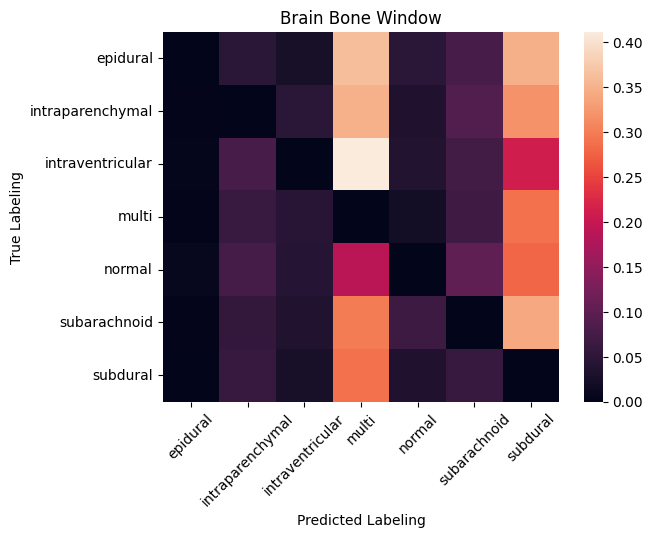

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['epidural', 'intraparenchymal', 'intraventricular', 'multi', 'normal', 'subarachnoid', 'subdural']

row_sum = conf_mx.sum(axis=1, keepdims=True)
nconf_mx = conf_mx/row_sum
np.fill_diagonal(nconf_mx,0)

sns.heatmap(nconf_mx, xticklabels=labels, yticklabels=labels)
plt.xticks(rotation=45)

plt.xlabel("Predicted Labeling")
plt.ylabel("True Labeling")
plt.title("Brain Bone Window")